## Homework 2: Julia's Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import os
import pickle

In [3]:
def juliaSet(len_points: int, xmin: int, xmax: int, ymin: int, ymax: int, maxiter: int, C: complex):
    x = np.linspace(xmin, xmax, len_points)
    y = np.linspace(ymin, ymax, len_points)
    output = np.zeros((len(y), len(x)))

    for i, xcoord in enumerate(x):
        for j, ycoord in enumerate(y):
            n = 0
            z = complex(xcoord, ycoord)
            while abs(z) <= 2.0 and n < maxiter:
                z = z**2 + C
                n += 1
            output[i, j] = n / maxiter
    return output

### Task 2.1

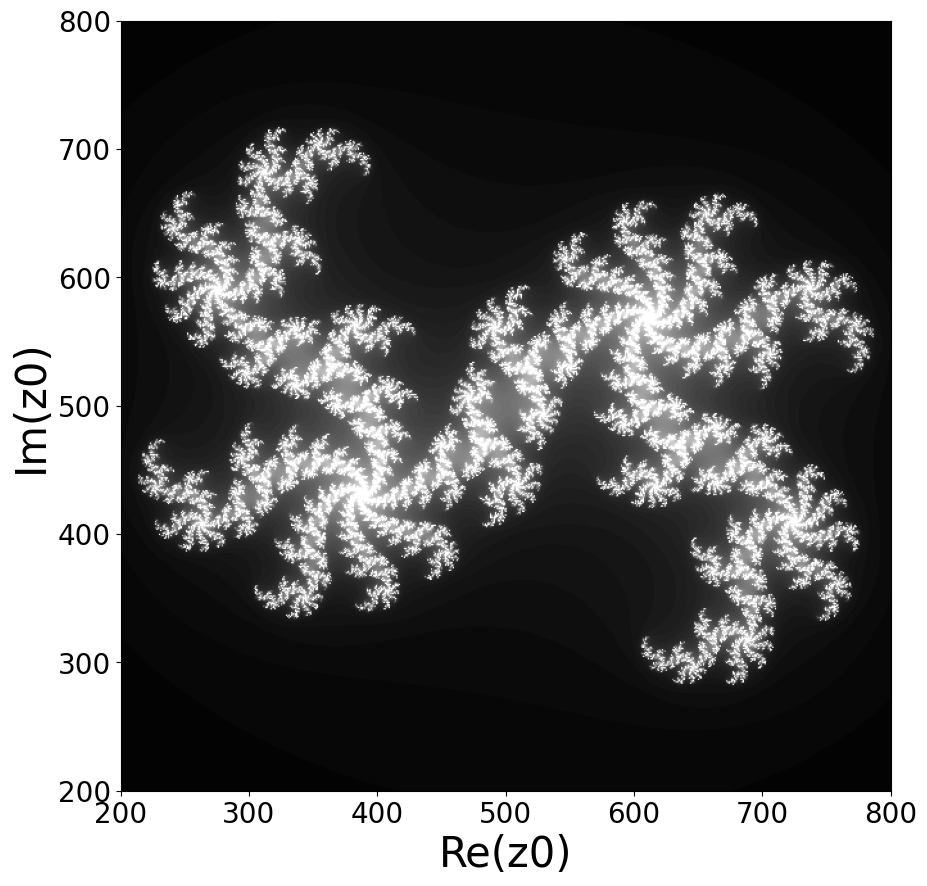

In [5]:
C1 = complex(0.4, 0.2)
output1 = juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=70,
    C=C1
)
fig = plt.figure(figsize=[15, 10], )
plt.imshow(output1, cmap=plt.cm.gray)
plt.xlabel('Re(z0)', fontsize=30)
plt.xticks(fontsize=20)
plt.xlim([200, 800])
plt.ylabel('Im(z0)', fontsize=30)
plt.yticks(fontsize=20)
plt.ylim([200, 800])
plt.show()

### Task 2.2

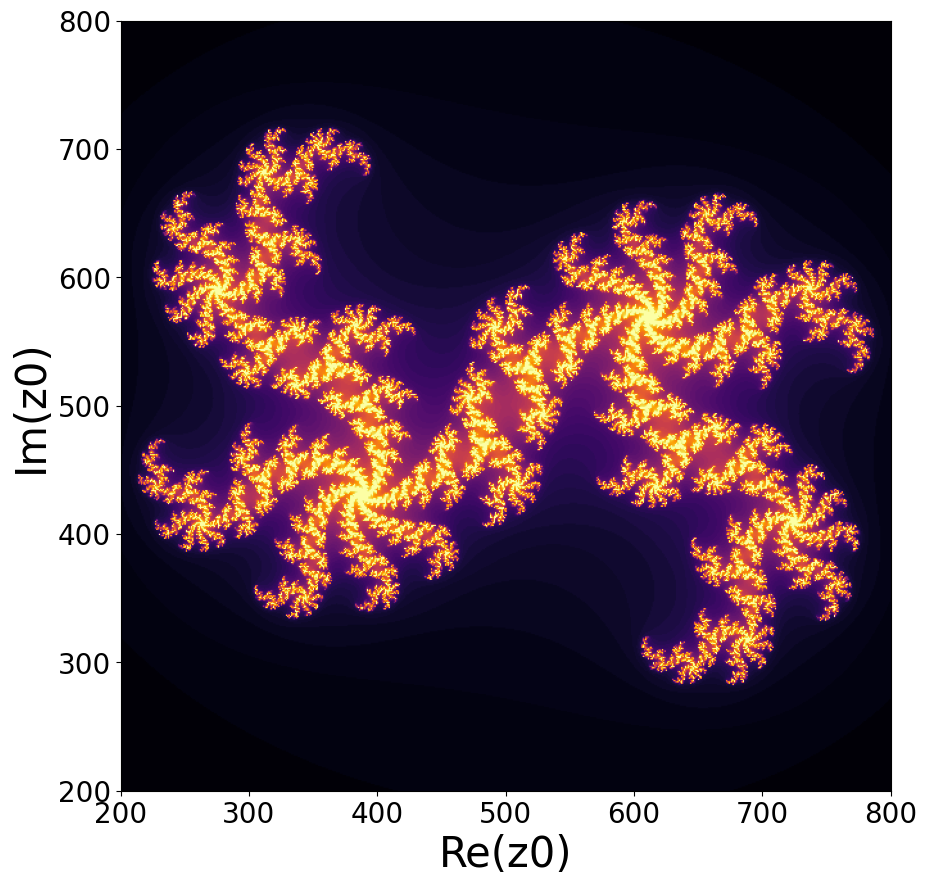

In [8]:
fig = plt.figure(figsize=[15, 10], )
plt.imshow(output1, cmap=plt.cm.inferno)
plt.xlabel('Re(z0)', fontsize=30)
plt.xticks(fontsize=20)
plt.xlim([200, 800])
plt.ylabel('Im(z0)', fontsize=30)
plt.yticks(fontsize=20)
plt.ylim([200, 800])
plt.show()

### Task 2.3

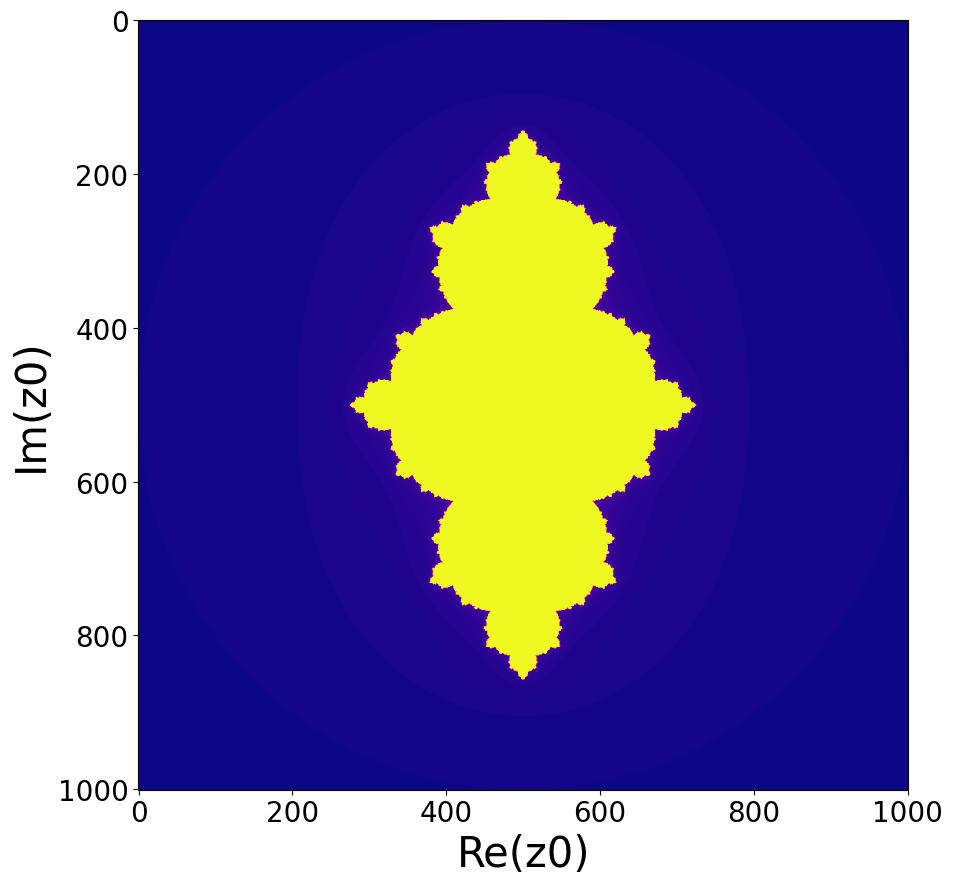

In [19]:
goldRatio = (1 + np.sqrt(5)) / 2
C2 = 1 - goldRatio
output2 = juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=100,
    C=C2
)

fig = plt.figure(figsize=[15, 10], )
plt.imshow(output2, cmap=plt.cm.plasma)
plt.xlabel('Re(z0)', fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel('Im(z0)', fontsize=30)
plt.yticks(fontsize=20)
plt.show()

### Task 2.4

In [4]:
C3 = [complex(np.cos(a), np.sin(a)) for a in np.linspace(0, 2*np.pi, 101)]
results = [
    juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=50,
    C=c
    ) 
    for c in C3
]

with open('juliaSet_results.pkl', 'wb') as f:
    pickle.dump(results, f)
    f.close()

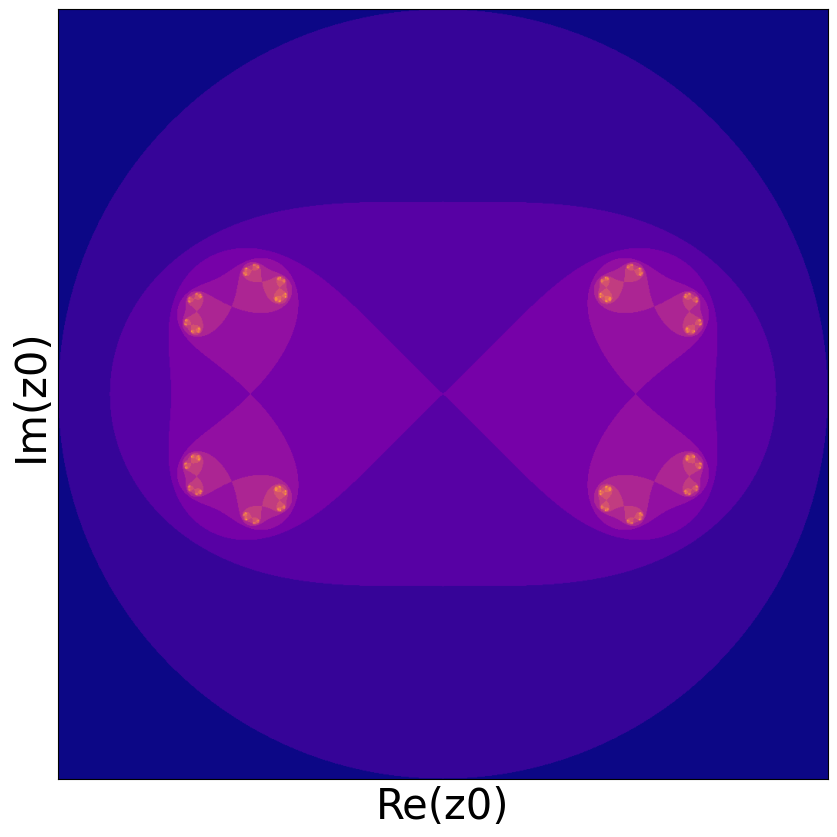

In [ ]:
with open('juliaSet_results.pkl', 'rb') as f:
    results = pickle.load(f)
    f.close()

fig = plt.figure(figsize=[15, 10], )
ax = plt.axes()


def update_data(frame):
    ax.clear()
    ax.set_xlabel('Re(z0)', fontsize=30)
    ax.set_xticks([], [], fontsize=20)

    ax.set_ylabel('Im(z0)', fontsize=30)
    ax.set_yticks([], [], fontsize=20)
    return [ax.imshow(results[frame], cmap=plt.cm.plasma)]

animation = FuncAnimation(
    fig=fig,
    func=update_data,
    frames=len(results),
    interval=80,
    blit=True
)
animation.save('juliaSet.gif', writer='imagemagick')

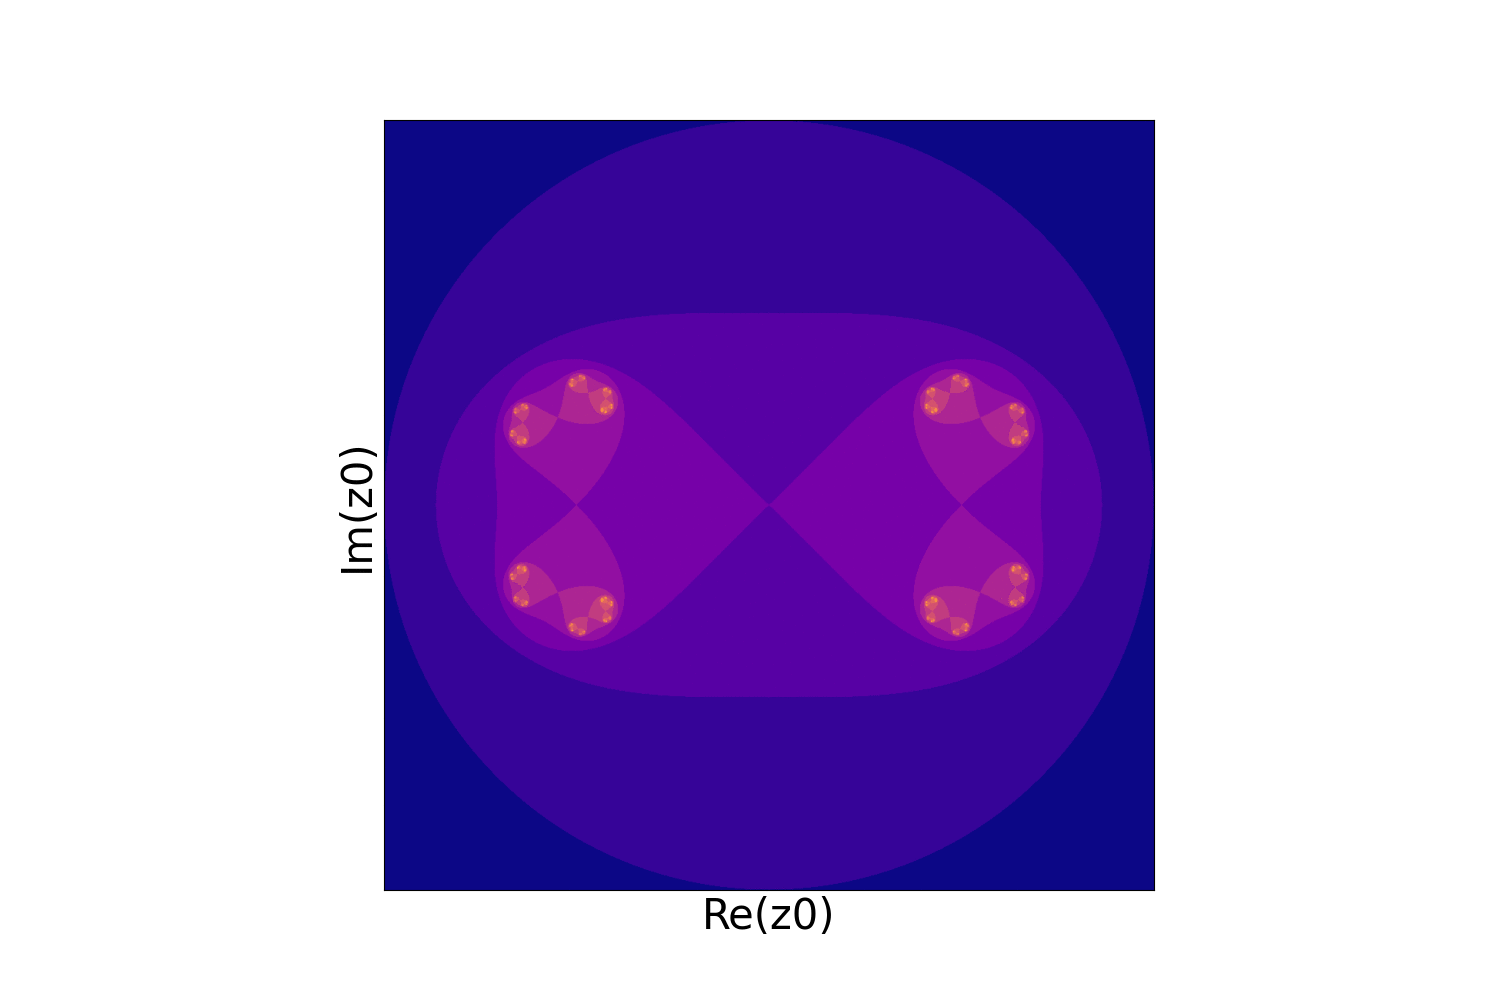

In [7]:
Image(open('juliaSet.gif','rb').read())